# **Convolutional Neural Networks (CNN)**
## Introduction
Convolutional Neural Networks (CNNs) are a type of deep learning model specifically designed for processing data with a grid-like topology, such as images. They are widely used in tasks like:
- Image classification
- Object detection
- Image segmentation

In this notebook, we will:
1. Explore the Fashion MNIST dataset.
2. Understand the architecture and building blocks of CNNs.
3. Train a CNN model on Fashion MNIST and evaluate its performance.
4. Learn the mathematical concepts behind convolutions, filters, pooling, and feature maps.


## 1. Dataset Overview: Fashion MNIST
The Fashion MNIST dataset contains 28x28 grayscale images of clothing items. There are 10 categories:
1. T-shirt/top
2. Trouser
3. Pullover
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

### Key Details
- Training images: 60,000
- Testing images: 10,000
- Image dimensions: 28x28 pixels


In [18]:
# Step 1: Import libraries and load the Fashion MNIST dataset
from tensorflow.keras.datasets import fashion_mnist

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Check the shapes of the data
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


### Code Explanation:
1. **Import libraries**: We import the `fashion_mnist` dataset from TensorFlow's Keras library.
2. **Load the dataset**: The `load_data()` method returns two tuples:
   - `(train_images, train_labels)` for training data.
   - `(test_images, test_labels)` for testing data.
3. **Shape of the dataset**:
   - Training images: `(60000, 28, 28)` - 60,000 grayscale images of size 28x28 pixels.
   - Training labels: `(60000,)` - Labels corresponding to the 60,000 images.
   - Testing images: `(10000, 28, 28)` - 10,000 grayscale images for testing.
   - Testing labels: `(10000,)` - Labels corresponding to the 10,000 test images.


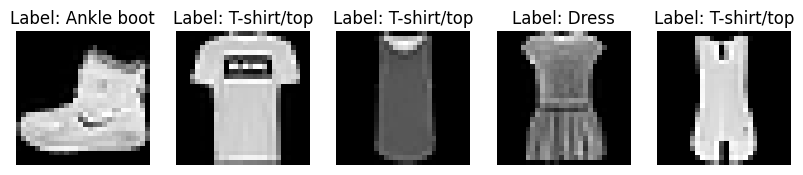

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Mapping Fashion MNIST labels to product categories
labels_map = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Display the first 5 images with their labels
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {labels_map[train_labels[i]]}")
    plt.axis('off')
plt.show()


- The `imshow` function from `matplotlib` is used to display the images.
- The `cmap='gray'` argument is used to display the images in grayscale.
- Each image is displayed in a subplot, and the title is set to the corresponding label of the image.

#Analyze the Distribution of Labels




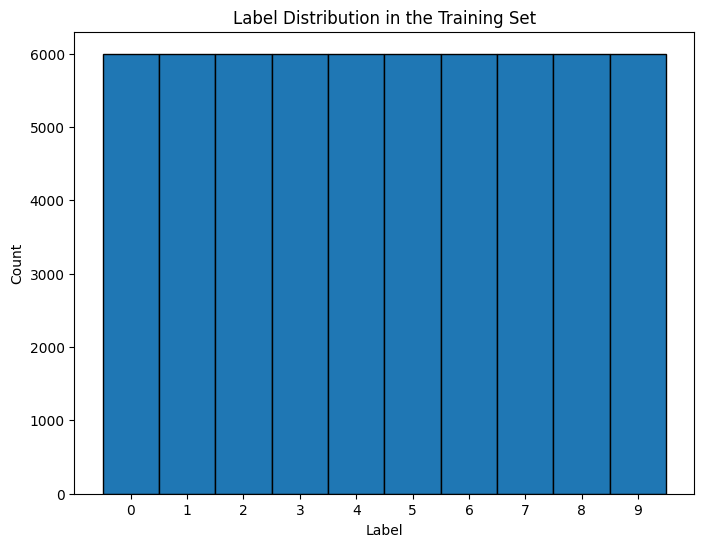

In [20]:

# Plot the distribution of labels
plt.figure(figsize=(8, 6))
plt.hist(train_labels, bins=np.arange(11) - 0.5, edgecolor='black')
plt.title("Label Distribution in the Training Set")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(np.arange(10))
plt.show()

- The `plt.hist()` function is used to plot the histogram of labels in the training set.
- `bins=np.arange(11) - 0.5` creates 10 bins, one for each label (0 to 9).
- We set the x-axis ticks to show the labels from 0 to 9 using `plt.xticks(np.arange(10))`.


In [7]:
# Step 2: Normalize the pixel values and reshape the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add a channel dimension to the data (required for CNNs)
train_images = train_images[..., None]
test_images = test_images[..., None]

# Verify the new shapes
print("Updated training images shape:", train_images.shape)
print("Updated testing images shape:", test_images.shape)


Updated training images shape: (60000, 28, 28, 1)
Updated testing images shape: (10000, 28, 28, 1)


### Code Explanation:
1. **Normalize pixel values**:
   - Pixel values in the images range from 0 to 255. Dividing by 255.0 scales them to the range [0, 1].
   - This helps the model converge faster during training.
2. **Add channel dimension**:
   - CNNs expect input data with a channel dimension (e.g., `(height, width, channels)`).
   - Since Fashion MNIST images are grayscale, we add a channel dimension using `[..., None]`.
   - New shape: `(60000, 28, 28, 1)` for training and `(10000, 28, 28, 1)` for testing.


## 2. Understanding CNN Architecture
A CNN typically consists of the following layers:
1. **Convolutional Layer**:
   - Extracts features using filters (kernels).
   - Each filter slides over the image to compute a feature map.
2. **Pooling Layer**:
   - Reduces the size of feature maps.
   - Common types: Max pooling, Average pooling.
3. **Fully Connected Layer**:
   - Flattens the feature maps and connects to the output layer.
   - Responsible for classification or regression tasks.

In the following sections, we will dive deeper into these components while implementing a CNN for Fashion MNIST.


In [8]:
# Step 3: Build the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a sequential model
model = Sequential([
    # Convolutional layer with 32 filters, 3x3 kernel size, ReLU activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # Max pooling layer with 2x2 pool size
    MaxPooling2D((2, 2)),

    # Another convolutional layer
    Conv2D(64, (3, 3), activation='relu'),

    # Max pooling layer
    MaxPooling2D((2, 2)),

    # Flatten the feature maps
    Flatten(),

    # Fully connected dense layer
    Dense(128, activation='relu'),

    # Output layer with 10 neurons (one for each class)
    Dense(10, activation='softmax')
])

# Display the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Code Explanation:
1. **Sequential Model**:
   - The model is built as a stack of layers, one after the other.
2. **Conv2D Layer**:
   - `32 filters`: Number of feature detectors (kernels) applied.
   - `3x3 kernel`: Size of each filter.
   - `ReLU activation`: Applies the Rectified Linear Unit activation function to introduce non-linearity.
   - `input_shape=(28, 28, 1)`: Specifies the shape of the input images.
3. **MaxPooling2D Layer**:
   - Pool size: `(2, 2)` reduces the size of the feature map by taking the maximum value in each 2x2 window.
4. **Flatten Layer**:
   - Converts the 2D feature maps into a 1D array to feed into the dense layers.
5. **Dense Layers**:
   - `128 neurons`: Fully connected layer with ReLU activation.
   - Output layer with 10 neurons (one for each class) and softmax activation for multi-class classification.
6. **Model Summary**:
   - Displays the architecture, including the number of parameters at each layer.



#### 1. What is a Convolution?
A convolution is a mathematical operation where two functions (in our case, the image and the filter) combine to produce a transformed output. In Convolutional Neural Networks (CNNs), this operation is used to extract features such as edges, textures, patterns, and shapes from an image.

The convolution operation involves sliding a **filter/kernel** over an input matrix (image) and performing an element-wise multiplication followed by a summation.

Mathematically:

Convolution Output at Position (i, j):

Output[i, j] = Σ Σ (Input[i+m][j+n] × Filter[m][n])



Where:
- `k`: Size of the filter (e.g., 3 × 3, 5 × 5)
- `i, j`: The top-left corner of the current position of the filter on the input image
- `m, n`: Indices of the filter matrix

---

#### 2. Filters (Kernels)
A filter (or kernel) is a small matrix of weights (e.g., 3 × 3) that is used to extract specific features from an image. Each filter detects a particular feature, such as edges or textures, by highlighting certain regions and suppressing others.

For example:
- **Edge Detection Filter**:
- **Blur Filter**:




When a filter slides over the input, its element-wise multiplication with the corresponding image region produces a transformed output.

---

#### 3. Receptive Field
The receptive field refers to the region of the input image that a particular neuron in a convolutional layer "sees."

For example:
- In the first layer of a CNN, the receptive field size equals the filter size (e.g., 3 × 3).
- As the depth of the CNN increases, the receptive field grows due to stacking of layers, allowing deeper neurons to capture more global patterns.

---

#### 4. Convolutional Operation Example
Let’s assume:
- Input Image = 5 × 5 matrix
- Filter = 3 × 3 matrix
- Stride = 1
- No Padding

The filter slides over the image and computes the output as:

Input Region (3 × 3): [1, 2, 3] [4, 5, 6] [7, 8, 9]

Filter (3 × 3): [1, 0, -1] [1, 0, -1] [1, 0, -1]

Element-wise Multiplication: [1×1, 2×0, 3×-1] [4×1, 5×0, 6×-1] [7×1, 8×0, 9×-1]

Sum of Results: (1+0-3) + (4+0-6) + (7+0-9) = -6


Thus, the output value for this position is `-6`. The same process is repeated as the filter slides across the input.

---

#### 5. Stride and Padding
- **Stride**: Determines how far the filter moves during convolution. Stride = 1 means the filter moves one pixel at a time.
- **Padding**: Adds a border of zeros around the input to preserve its spatial dimensions.

---

#### 6. Convolution Output Size
The output dimensions of the convolution can be calculated using the formula:

Output Width = (Input Width - Filter Width + 2 × Padding) / Stride + 1 Output Height = (Input Height - Filter Height + 2 × Padding) / Stride + 1


For example:
- Input = 5 × 5
- Filter = 3 × 3
- Stride = 1
- Padding = 0

Output Size:

(5 - 3 + 2×0) / 1 + 1 = 3 × 3

#### 7. Feature Maps and Activation Maps

When a filter is applied to an image, the resulting output is called a **feature map** (or activation map). The feature map captures the responses of the filter to different regions of the image.

For instance, if a filter detects horizontal edges, the resulting feature map highlights where the edges occur in the image. Each convolutional layer applies multiple filters to generate several feature maps, helping the network learn different types of features at various levels of abstraction.

The feature maps are typically passed through an **activation function** (such as ReLU) to introduce non-linearity, enabling the network to learn more complex patterns.

#### 8. Pooling Layers

Pooling layers are used after convolutional layers to reduce the spatial dimensions of the feature maps. This helps to:
- Decrease the number of parameters and computational cost.
- Prevent overfitting by abstracting the feature representation.

The two most common types of pooling are:
- **Max Pooling**: Selects the maximum value from each region of the feature map.
- **Average Pooling**: Averages the values from each region.

For example, a 2x2 max pooling operation on the following matrix:

[1, 3, 2, 4] [5, 6, 7, 8] [9, 10, 11, 12] [13, 14, 15, 16]

Would produce:

[6, 8] [14, 16]

This reduces the dimensionality of the feature map.

#### 9. Fully Connected Layers

After several convolutional and pooling layers, the high-level features from the image are typically flattened into a 1D vector. This vector is then passed to one or more **fully connected layers** to make predictions.

A fully connected layer is similar to a traditional neural network layer, where each neuron is connected to every neuron in the previous layer. These layers are used to classify the final output based on the learned features.

For example, in image classification tasks, the fully connected layer might output probabilities for each class, such as cat, dog, or bird.

---

#### 10. Mathematical Notation for Convolution

The convolution operation can be represented mathematically as:

Y(i, j) = Σ Σ X(i + m, j + n) * F(m, n)

Where:
- `X` is the input image.
- `F` is the filter (or kernel).
- `Y` is the output of the convolution.
- `i, j` are the positions of the filter on the input.
- `m, n` are the filter dimensions.

The process involves multiplying each element of the filter with the corresponding pixel in the image and summing them up to produce one value in the output feature map.

---

#### 11. Visualizing Filters and Feature Maps

It’s important to visualize filters and the feature maps produced by them to understand how CNNs work. Filters can learn various patterns like:
- **Edges**: A filter might learn to recognize vertical or horizontal edges.
- **Textures**: Filters can also capture more complex patterns like textures or gradients.
- **Object Parts**: Deeper layers might capture parts of objects, such as corners, shapes, or specific features.

A feature map visualization can give insights into which parts of the image the network is focusing on at different layers.

---

#### 12. Example: Applying Convolution in Code

Here’s a quick overview of the steps we follow when performing convolution in CNN:

1. **Load and preprocess the image**: Resize the image and normalize pixel values.
2. **Apply multiple filters**: Each filter is applied to the input image to extract different features.
3. **Use activation function**: After the convolution, apply a non-linear activation (like ReLU) to introduce non-linearity.
4. **Pooling**: Use pooling to downsample and retain the most important features.
5. **Flatten**: Convert the pooled feature map into a 1D array for classification.
6. **Fully connected layer**: Classify the features into the desired output (e.g., identifying the object in the image).

In the following code cell, we'll implement a simple CNN model on the Fashion MNIST dataset, including convolution, pooling, and fully connected layers. This example will help solidify the concepts we've discussed so far.



In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Explanation of Code:

1. optimizer='adam': This sets the Adam optimizer, which is a popular choice due to its efficiency and adaptability during training.
2. loss='sparse_categorical_crossentropy': This is the loss function for multi-class classification problems where labels are integers (not one-hot encoded). If labels were one-hot encoded, we would use categorical_crossentropy.
3. metrics=['accuracy']: This tells the model to track the accuracy metric, which will be printed during training to assess how well the model is performing.

In [11]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 57ms/step - accuracy: 0.7616 - loss: 0.6737 - val_accuracy: 0.8485 - val_loss: 0.4120
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 69ms/step - accuracy: 0.8782 - loss: 0.3360 - val_accuracy: 0.8859 - val_loss: 0.3158
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 59ms/step - accuracy: 0.8990 - loss: 0.2775 - val_accuracy: 0.8924 - val_loss: 0.2927
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 54ms/step - accuracy: 0.9095 - loss: 0.2458 - val_accuracy: 0.8980 - val_loss: 0.2760
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 97s 70ms/step - accuracy: 0.9202 - loss: 0.2176 - val_accuracy: 0.9072 - val_loss: 0.2547
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 50ms/step - accuracy: 0.9273 - loss: 0.1952 - val_accuracy: 0.9079 - val_loss: 0.2555
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 93s 62ms/step - accuracy: 0.9336 - loss: 0.1777 - val_accuracy: 0.9099 - val_loss: 0.2496
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 54ms/step - accuracy: 0.9413 - loss: 0.1573 - 

Explanation:

1. train_images and train_labels: The training data and labels used to train the model.
2. epochs=10: The number of complete passes through the training data.
3. batch_size=64: The number of training samples processed before the model is updated.
4. validation_data=(test_images, test_labels): We pass the validation data (test set) to monitor the model's performance on unseen data during training.

In [12]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9125 - loss: 0.2705
Test accuracy: 0.9153000116348267


Explanation:

1. model.evaluate(): This function evaluates the model's performance on the test data.
2. test_loss and test_acc: The function returns the loss and accuracy of the model on the test data.

### Step 10: Make Predictions with the Model

Now, let's make predictions using the trained model. We will select some random test images, pass them through the model, and display the predicted labels along with the images.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


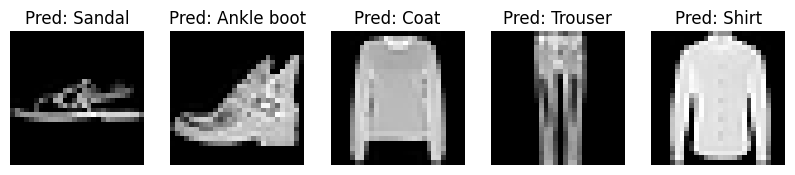

In [25]:
# Select random test images
random_indices = np.random.randint(0, test_images.shape[0], 5)
sample_images = test_images[random_indices]
sample_labels = test_labels[random_indices]

# Predict the labels for these images
predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

# Mapping Fashion MNIST labels to product categories
labels_map = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Plot the sample images and their predicted labels
plt.figure(figsize=(10, 5))
for i, index in enumerate(random_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Pred: {labels_map[predicted_classes[i]]}")
    plt.axis('off')
plt.show()


Explanation:

- random_indices = np.random.randint(0, test_images.shape[0], 5): This randomly selects 5 indices from the test set.
- sample_images = test_images[random_indices]: Selects the images at the random indices.
- sample_labels = test_labels[random_indices]: Selects the corresponding labels for those images.
- model.predict(sample_images): Passes the selected images through the model to get the predicted labels (probabilities).
- np.argmax(predictions, axis=1): Converts the predicted probabilities into class labels by choosing the class with the highest probability.
- plt.imshow(sample_images[i], cmap='gray'): Displays each image in grayscale.
- plt.title(f"Pred: {predicted_classes[i]}"): Displays the predicted class label above the image.

In [16]:
# Compare predicted labels with actual labels
for i in range(5):
    print(f"Image {i+1}:")
    print(f"True label: {np.argmax(sample_labels[i])}, Predicted label: {predicted_classes[i]}")
    print()


Image 1:
True label: 0, Predicted label: 1

Image 2:
True label: 0, Predicted label: 4

Image 3:
True label: 0, Predicted label: 9

Image 4:
True label: 0, Predicted label: 8

Image 5:
True label: 0, Predicted label: 0



Explanation:

- This block of code compares the predicted labels with the actual labels for each selected image.
- np.argmax(sample_labels[i]): Converts the true label into a class label (since it's one-hot encoded).
- predicted_classes[i]: The predicted class for the image.

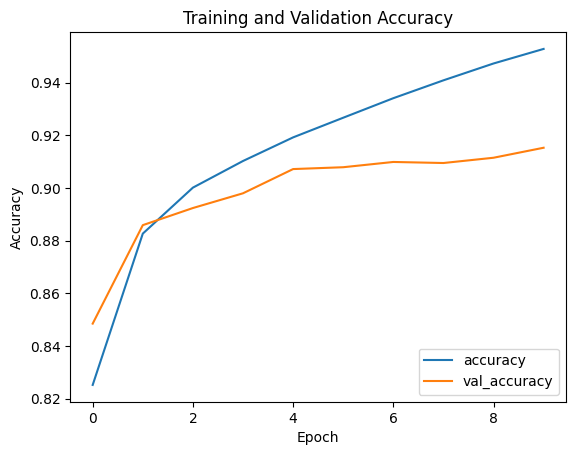

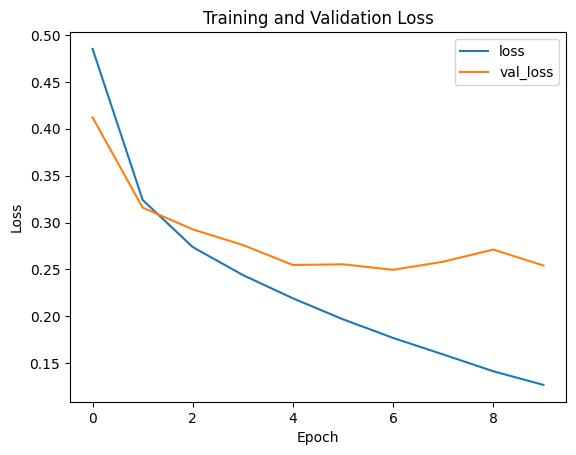

In [13]:
# Plot accuracy and loss curves
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Explanation:

1. history.history['accuracy']: This contains the accuracy values for each epoch during training.
2. history.history['val_accuracy']: This contains the validation accuracy for each epoch.
3. Similarly, we plot the loss values ('loss' and 'val_loss').

The training and validation curves help us understand how well the model is performing and if it's overfitting or underfitting.

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


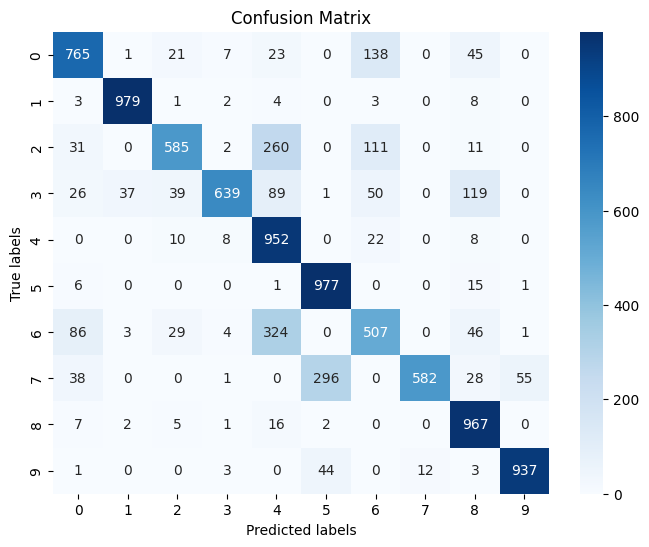

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      1000
           1       0.96      0.98      0.97      1000
           2       0.85      0.58      0.69      1000
           3       0.96      0.64      0.77      1000
           4       0.57      0.95      0.71      1000
           5       0.74      0.98      0.84      1000
           6       0.61      0.51      0.55      1000
           7       0.98      0.58      0.73      1000
           8       0.77      0.97      0.86      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.79     10000
   macro avg       0.82      0.79      0.78     10000
weighted avg       0.82      0.79      0.78     10000



In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the test set
y_pred = model.predict(test_images)
y_pred_classes = y_pred.argmax(axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
print("Classification Report:\n", classification_report(test_labels, y_pred_classes))


### Key Observations:
1. **Diagonal Dominance**:
   - Most of the predictions lie on the diagonal, indicating that the model performs well in correctly classifying the majority of the images.
   - For example, label `1` has **979 correct predictions** out of total instances in this class, suggesting high accuracy for this category.

2. **Class-Specific Performance**:
   - **Class 1, 5, 8, and 9** show very high precision and recall since they have minimal misclassifications.
   - **Class 2 (Pullover)** shows significant misclassifications, with **260 instances misclassified as Class 4 (Coat)** and **111 as Class 6 (Shirt)**. This indicates confusion among similar-looking clothing types.
   - **Class 6 (Shirt)** is the most confused class, with substantial misclassifications across **Class 2 (Pullover)** and **Class 4 (Coat)**.

3. **Inter-Class Confusion**:
   - There is a pattern of confusion between **Class 2 (Pullover)**, **Class 4 (Coat)**, and **Class 6 (Shirt)**, which is likely because these clothing types share visual similarities in the dataset.
   - **Class 7 (Sneaker)** and **Class 9 (Ankle Boot)** are sometimes confused with each other but maintain relatively high precision compared to other classes.

4. **Classes with High Misclassification**:
   - **Class 2 (Pullover)** has only **585 correct predictions** compared to its total, which shows significant room for improvement.
   - **Class 6 (Shirt)** also suffers from high misclassification, as **507 instances** are predicted as Class 4 (Coat).

5. **Potential Bias**:
   - Some classes (like 1 and 8) have very low misclassification rates, which may indicate that the model is biased towards easily distinguishable classes.


### **Conclusion**

Convolutional Neural Networks (CNNs) are a powerful and efficient deep learning architecture designed to process grid-like data such as images. By leveraging key operations like **convolutions**, **pooling**, and **non-linear activation functions**, CNNs extract hierarchical features that enable them to perform exceptionally well in tasks like **image classification, object detection, and image segmentation**.

Through this notebook, we explored the following key concepts:

1. **Dataset Overview**: We analyzed the Fashion MNIST dataset, which serves as a robust benchmark for image classification tasks.
2. **Preprocessing**: Normalizing pixel values and reshaping the data to prepare it for CNNs.
3. **CNN Architecture**:
   - Convolutional layers for feature extraction.
   - Pooling layers to reduce spatial dimensions and parameters.
   - Fully connected layers for classification tasks.
4. **Mathematical Intuition**: Understanding how convolutions, filters, receptive fields, strides, and padding contribute to feature extraction.
5. **Training and Evaluation**: Implementing a CNN model for Fashion MNIST and interpreting its performance through metrics like accuracy.

CNNs continue to be a cornerstone of computer vision applications, providing state-of-the-art performance in real-world tasks. With the ability to extract meaningful features and adapt to complex patterns, they remain a foundational tool for solving a wide range of image-based problems in both academic research and industry.